In [6]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import torch
import torchvision 

import numpy as np
import pandas as pd
import albumentations as A
import matplotlib.pyplot as plt 

from PIL import Image
from tqdm.cli import tqdm
from pathlib import Path

In [8]:
data_folder = Path("data")
folds_folder = Path("folds")

In [4]:
with open(data_folder / "labels.txt") as f:
    body = f.readlines()

In [5]:
len(body)

1605

In [6]:
print(len(list(data_folder.glob("*/*.png"))), len(list(data_folder.glob("*/*.npy"))))


29476 1605


In [17]:
sizes = {}
for seq_folder in tqdm(list(data_folder.glob("S_*"))):
    img_filenames = list(seq_folder.glob("*.png"))
    mask_filenames = list(seq_folder.glob("*.npy"))
    
    sizes[seq_folder.name] = {"img": {}, "mask": {}}
    for img_fn in img_filenames:
        img = cv2.imread(str(img_fn))
        sizes[seq_folder.name]["img"][img_fn.name] = img.shape
        
    for mask_fn in mask_filenames:
        mask = np.load(mask_fn)
        sizes[seq_folder.name]["mask"][mask_fn.name] = mask.shape
    


100%|██████████| 200/200 [01:07<00:00,  2.98it/s]


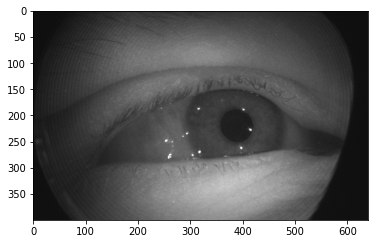

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [80]:
np.array(Image.open(list(data_folder.glob("*/*.png"))[0]))

array([[27, 24, 25, ..., 25, 21, 25],
       [23, 30, 26, ..., 21, 21, 24],
       [28, 25, 25, ..., 24, 23, 25],
       ...,
       [28, 30, 29, ..., 18, 22, 20],
       [30, 31, 28, ..., 20, 21, 19],
       [32, 31, 30, ..., 24, 19, 17]], dtype=uint8)

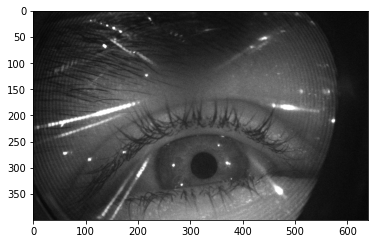

In [90]:
plt.imshow(cv2.imread(str(list(data_folder.glob("*/*.png"))[0]), cv2.IMREAD_GRAYSCALE), cmap='gray')

In [64]:
rgb_equal = []
for img_fn in tqdm(list(data_folder.glob("*/*.png"))):
    img = cv2.imread(str(img_fn))
    rgb_equal.append(((img[:, :, 0] == img[:, :, 1]) & (img[:, :, 1] == img[:, :, 2])).all())

100%|██████████| 29476/29476 [01:17<00:00, 378.98it/s]


In [63]:
((img[:, :, 0] == img[:, :, 1]) & (img[:, :, 1] == img[:, :, 2])).all()

True

In [67]:
np.array(rgb_equal).all()

True

In [32]:
np.array([v == (400, 640) for s in sizes.values() for v in s["mask"].values()]).all()

True

In [9]:
for seq_folder in list(data_folder.glob("S_*")):
    img_filenames = list(seq_folder.glob("*.png"))
    mask_filenames = list(seq_folder.glob("*.npy"))
    print(f"seq: {seq_folder.name}, img count: {len(img_filenames)}, mask count: {len(mask_filenames)}")
    print(f"labled: {len(mask_filenames) / len(img_filenames)}")
    print()

seq: S_7, img count: 157, mask count: 12
labled: 0.07643312101910828

seq: S_101, img count: 142, mask count: 7
labled: 0.04929577464788732

seq: S_68, img count: 144, mask count: 8
labled: 0.05555555555555555

seq: S_37, img count: 144, mask count: 9
labled: 0.0625

seq: S_71, img count: 144, mask count: 8
labled: 0.05555555555555555

seq: S_55, img count: 159, mask count: 10
labled: 0.06289308176100629

seq: S_169, img count: 153, mask count: 7
labled: 0.0457516339869281

seq: S_161, img count: 150, mask count: 7
labled: 0.04666666666666667

seq: S_73, img count: 145, mask count: 8
labled: 0.05517241379310345

seq: S_180, img count: 142, mask count: 6
labled: 0.04225352112676056

seq: S_187, img count: 143, mask count: 6
labled: 0.04195804195804196

seq: S_21, img count: 147, mask count: 10
labled: 0.06802721088435375

seq: S_94, img count: 164, mask count: 9
labled: 0.054878048780487805

seq: S_197, img count: 144, mask count: 6
labled: 0.041666666666666664

seq: S_18, img count: 14

In [25]:
mean = []
std = []
for img_fn in tqdm(list(data_folder.glob("*/*.png"))):
    img = cv2.imread(str(img_fn), cv2.IMREAD_GRAYSCALE)
    img = torchvision.transforms.functional.to_tensor(img)
    mean.append(img.mean().item())
    std.append(img.std().item())
    
avg_mean = np.mean(mean)
avg_std = np.mean(std)

100%|██████████| 29476/29476 [01:19<00:00, 370.61it/s]


In [26]:
print(avg_mean, avg_std)

0.2971084261137913 0.15818713384333274


In [30]:
img.shape

torch.Size([1, 400, 640])

## Count mean and std for train_masks_channel

In [ ]:
train_df, val_df = load_splits(folds_folder)

In [ ]:
train_masks_channel_mean = []
train_masks_channel_std = []
for i in tqdm(range(1, 201)):
    for fn in train_df[train_df.seq == i].mask_filename:
        train_masks.append(np.load(fn))
    train_masks_channel = np.mean(train_masks, axis=0)
    train_masks_channel = (train_masks_channel * 50).astype(np.uint8)
    train_masks_channel = torchvision.transforms.functional.to_tensor(train_masks_channel).float()
    train_masks_channel_mean.append(train_masks_channel.mean().item())
    train_masks_channel_std.append(train_masks_channel.std().item())


np.mean(train_masks_channel_mean), np.mean(train_masks_channel_std)